In [45]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

In [23]:
# Function to display synthetic data
def display_data(adc_measurements, quantity, quantity_label, title):
    plt.scatter(adc_measurements, quantity, marker='o', color='blue')
    plt.title(title)
    plt.xlabel('ADC Measurements (0-4095)')
    plt.ylabel(quantity_label)
    # plt.xlim(min(adc_measurements), max(adc_measurements))
    # plt.ylim(min(quantity), max(quantity))
    plt.grid()
    plt.tight_layout()
    plt.show()


In [52]:
# This function writes the data to a CSV file
def store_data_to_csv(file_name, x_data, y_data, header=['ADC Measurements', 'Quantity'], folder_name='csv', rounding_n_decimals=1):
    os.makedirs(folder_name, exist_ok=True)

    with open(os.path.join(folder_name, file_name), mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
        for x, y in zip(x_data, y_data):
            if rounding_n_decimals is not None:
                x = round(x, rounding_n_decimals)
                y = round(y, rounding_n_decimals)
            writer.writerow([x, y])

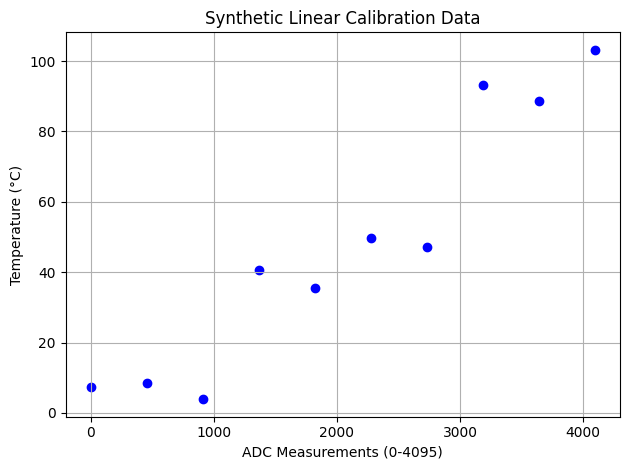

In [54]:
# Synthesize linear calibration data
def synthesize_linear_calibration_data(adc_max = 4095, slope = 10, offset = 0, num_points=10, noise_level=0.1):
    """
    Generate synthetic linear calibration data with noise.
    
    Parameters:
    num_points (int): Number of data points to generate.
    noise_level (float): Standard deviation of Gaussian noise.
    
    Returns:
    tuple: Two numpy arrays representing the x and y values of the calibration data.
    """
    x = np.linspace(0, adc_max, num_points)
    y = slope * x + np.random.normal(0, noise_level, num_points) + offset
    return x, y

adc, temp = synthesize_linear_calibration_data(noise_level=10,slope=0.024, offset=0)
display_data(adc, temp, "Temperature (°C)", 'Synthetic Linear Calibration Data')

store_data_to_csv('temperature_calibration.csv', adc, temp, header=['ADC Measurements', 'Temperature (degrees Celsius)'], folder_name='csv')
